In [29]:
import seaborn as sns
import pandas as pd
import calendar
import datetime
import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'svg'
%matplotlib inline 

In [30]:
test = pd.read_pickle("single_station.pickle")
test

,NEW_STATION,DATE,TOTALS
0,1 AV-L,2018-04-28,33868.0
1,1 AV-L,2018-04-29,36345.0
2,1 AV-L,2018-04-30,45279.0
3,1 AV-L,2018-05-01,45015.0
4,1 AV-L,2018-05-02,47635.0
5,1 AV-L,2018-05-03,48438.0
6,1 AV-L,2018-05-04,49248.0
7,1 AV-L,2018-05-05,33398.0
8,1 AV-L,2018-05-06,34670.0
9,1 AV-L,2018-05-07,42944.0


In [31]:
# Convert timestamp to datetime.date object
test['DATE'].iloc[0].date().strftime('%m-%d-%Y')

'04-28-2018'

In [32]:
'''Monday = 0, ... Sunday = 6'''
test['DATE'].iloc[0].date().weekday() 

5

In [33]:
type(test['DATE'])
#test.DATE.dt.month[0]

pandas.core.series.Series

In [34]:
monthdayweek = []
for d in test['DATE']:
    #Convert date object to interger
    date = d.date().strftime('%m-%d-%Y')
    month  = int(date[0:2])
    day = int(date[3:5])
    year   = int(date[7:11])
    #Find the day of the week for a given daye
    wday_idx  = datetime.date(year,month,day).weekday()  
    monthdayweek += [[month, day, wday_idx]]
    


In [35]:
week_total = np.zeros(7) # for 7 days

In [36]:
week_total = np.zeros(7) # for 7 days

# Assume for just 1 station 
for index, row in test.iterrows():
    
    # Convert date object to interger
    date = row[1].date().strftime('%m-%d-%Y')
    month  = int(date[0:2])
    day = int(date[3:5])
    year   = int(date[7:11])
    # Find the day of the week for a given day
    # Monday = 0, ... Sunday = 6
    wday_idx  = datetime.date(year,month,day).weekday()  
    week_total[wday_idx] += row[2]
    

Text(0, 0.5, 'Traffic')

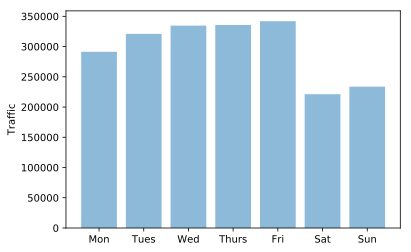

In [37]:
days = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']
plt.bar(range(len(days)), week_total,align='center', alpha=0.5)
plt.xticks(np.arange(len(days)), days)
plt.ylabel('Traffic')

In [38]:
test_total = pd.read_pickle("station_totals.pickle").reset_index()
type(test_total)

pandas.core.frame.DataFrame

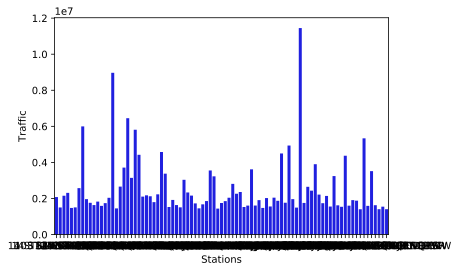

In [39]:
Selected_1400000 = test_total[test_total['TOTALS'] > 1400000]
ax = sns.barplot(x='NEW_STATION', y='TOTALS', data=Selected_1400000, color='blue')
ax.set(xlabel='Stations', ylabel='Traffic')
plt.show()

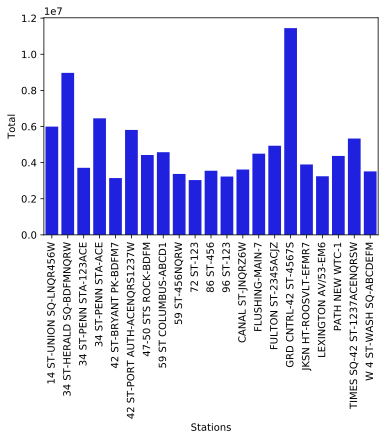

In [40]:
Selected_1400000 = test_total[test_total['TOTALS'] > 3000000]
ax = sns.barplot(x='NEW_STATION', y='TOTALS', data=Selected_1400000, color='blue')
ax.set(xlabel='Stations', ylabel='Total')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=10)
plt.savefig("Subway3mil.png",ddpi=700)
#plt.show()


In [41]:
len(test_total)

474

In [42]:
len(Selected_1400000)

21